### Lecture 21 Markov chain Monte Carlo methods for Uncertainty Quantification (Introduction)

## Objectives

+ Objective 1: Why MCMC is needed ?
+ Objective 2: How to construct a MCMC sampler ?
+ Objective 3: How to tune the MCMC sampler ?

## Readings


+ For Monte Carlo:
    + Brian D. Ripley (2009). Stochastic Simulation
+ For Markov chain Monte carlo
    + Christian P. Robert and George Casella (2004). Monte Carlo Statistical Methods (Sections 6,8,9)
        + ... as a textbook
+ For software (Python, pyMC) 
    + Cameron Davidson-Pilon (2015). Probabilistic Programming and Bayesian Methods for Hackers 
        + ... there are several examples for practice 

# Why do we need, Markov chain Monte Carlo (MCMC) ???

![](slides_mcmc_1/slides-1.png)

![](slides_mcmc_1/slides-2.png)

## Application: Challenger Space Shuttle disaster


STORY: On January 28, 1986, the twenty-fifth flight of the U.S. space shuttle program ended in disaster when one of the rocket boosters of the Shuttle Challenger exploded shortly after lift-off, killing all seven crew members. The presidential commission on the accident concluded that it was caused by the failure of an O-ring in a field joint on the rocket booster, and that this failure was due to a faulty design that made the O-ring unacceptably sensitive to a number of factors including outside temperature. Of the previous 24 flights, data were available on failures of O-rings on 23, (one was lost at sea), and these data were discussed on the evening preceding the Challenger launch, but unfortunately only the data corresponding to the 7 flights on which there was a damage incident were considered important and these were thought to show no obvious trend.

QUESTION: At specific temperature, what is the probability of a damage incident? 


Numerical example ...

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import pymc as pm
from ipywidgets import interactive


Temp (F), O-Ring failure?
[[ 66.   0.]
 [ 70.   1.]
 [ 69.   0.]
 [ 68.   0.]
 [ 67.   0.]
 [ 72.   0.]
 [ 73.   0.]
 [ 70.   0.]
 [ 57.   1.]
 [ 63.   1.]
 [ 70.   1.]
 [ 78.   0.]
 [ 67.   0.]
 [ 53.   1.]
 [ 67.   0.]
 [ 75.   0.]
 [ 70.   0.]
 [ 81.   0.]
 [ 76.   0.]
 [ 79.   0.]
 [ 75.   1.]
 [ 76.   0.]
 [ 58.   1.]]


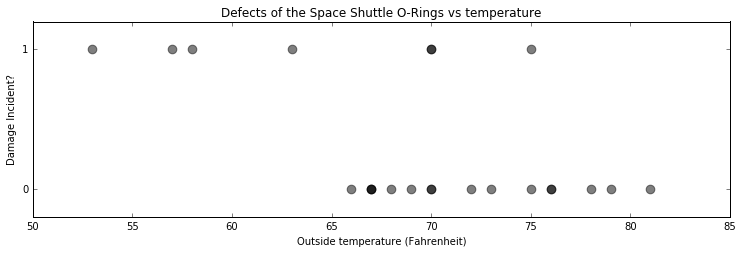

In [2]:
# ############
# DATA
# ############

# GET THE DATA
figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)
challenger_data = np.genfromtxt("data_mcmc_1/challenger_data.csv", skip_header=1,
                                usecols=[1, 2], missing_values="NA",
                                delimiter=",")
# SET THE DATA
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]

# PRINT THE DATA
print "Temp (F), O-Ring failure?"
print challenger_data

# PLOT THE DATA
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k",
            alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside temperature (Fahrenheit)")
plt.title("Defects of the Space Shuttle O-Rings vs temperature")

![](slides_mcmc_1/slides-4.png)

Numerical example ...

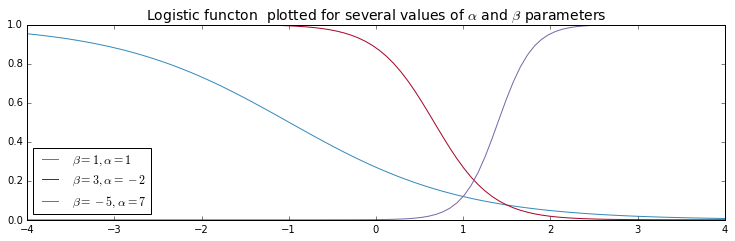

In [4]:
# ###############################
# TRY LINK FINCTIONS (OPTIONAL)
# ###############################

def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

#plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw=1)
#plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw=1)
#plt.plot(x, logistic(x, -5), label=r"$\beta = -5$", ls="--", lw=1)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha = 1$",
         color="#348ABD")
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha = -2$",
         color="#A60628")
plt.plot(x, logistic(x, -5, 7), label=r"$\beta = -5, \alpha = 7$",
         color="#7A68A6")

plt.title("Logistic functon  plotted for several values of $\\alpha$ and $\\beta$ parameters", fontsize=14)
plt.legend(loc="lower left");

In [5]:
# ###############################
# DEFINE THE BAYESIAN MODEL
# ###############################

# PRIORS
beta = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)

# LIKELIHOOD
temperature = challenger_data[:, 0]
D = challenger_data[:, 1]  # defect or not?

@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta):
    return 1.0 / (1. + np.exp(beta * t + alpha))
p.value

# connect the probabilities in `p` with our observations through a
# Bernoulli random variable.
observed = pm.Bernoulli("bernoulli_obs", p, value=D, observed=True)

# COMPUT THE POSTERIOR MODEL
model = pm.Model([observed, beta, alpha])

![](slides_mcmc_1/slides-5.png)

![](slides_mcmc_1/slides-6.png)

![](slides_mcmc_1/slides-7.png)

Numerical example ...

![](slides_mcmc_1/slides-8.png)

![](slides_mcmc_1/slides-9.png)

![](slides_mcmc_1/slides-10.png)

![](slides_mcmc_1/slides-11.png)

![](slides_mcmc_1/slides-12.png)

![](slides_mcmc_1/slides-13.png)

![](slides_mcmc_1/slides-14.png)

![](slides_mcmc_1/slides-15.png)

![](slides_mcmc_1/slides-16.png)

# MCMC inference by using a well designed MCMC

Numerical example ...

In [6]:
# ###################
# GET THE MCMC SAMPLE
# ###################

N_iter = 100000

mcmc = pm.MCMC(model)
mcmc.sample(N_iter)
mcmc_sample = np.zeros((2,N_iter))
mcmc_sample[0,:] = mcmc.trace('alpha')[:, None].copy().flatten(1)
mcmc_sample[1,:] = mcmc.trace('beta')[:, None].copy().flatten(1)


 [-----------------100%-----------------] 100000 of 100000 complete in 6.8 sec

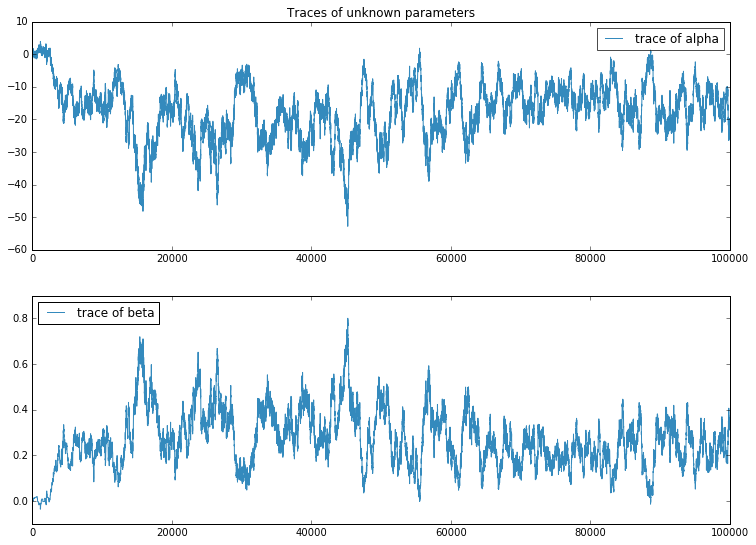

In [7]:
# ######################################
# TRACE PLOTS OF THE SAMPLE
# ######################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 9)
plt.subplot(211)
lw = 1
#center_trace = mcmc.trace
# alpha_samples = mcmc.trace('alpha')[:, None]  # best to make them 1d

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"]
#if center_trace[-1, 0] > center_trace[-1, 1] \
#    else ["#A60628", "#348ABD"]

plt.plot(alpha_sample, label="trace of alpha", c=colors[0])
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(212)
# beta_samples = mcmc.trace('beta')[:, None]
plt.plot(beta_sample, label="trace of beta",
     c=colors[0], lw=lw)
plt.legend(loc="upper left")


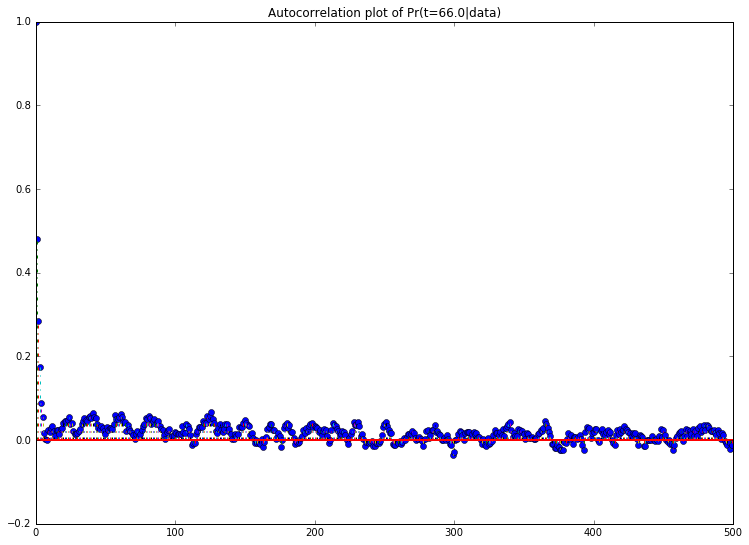

In [8]:

# AUTOCORRELATION OF ESTIMATED Pr(66.0)

def myacorr(x) :
    mean_x = x.mean()
    z = np.fft.fft( x-mean_x, int(2**np.ceil( np.log2(2*x.size) ))+1 )
    z = z.real**2 + z.imag**2
    z = np.fft.ifft( z ).real
    z = z[:x.size]
    z = z/z[0]
    return z

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

xx = logistic(66.0,  beta_sample[-5000:] , alpha_sample[-5000:] ).flatten(1)

yy = myacorr(xx)[:500]
figsize(12.5, 9)
markerline, stemlines, baseline = plt.stem( yy, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title("Autocorrelation plot of Pr(t=66.0|data)")


Point estimate for alpha: -17.3315294567
Standard error for alpha: 5.41000563234
 
Point estimate for beta: 0.2666316215
Standard error for beta: 0.0801095660918
 
Point estimate for Pr(t=66.0|data): 0.439077303766
Standard error for betPr(t=66.0|data):a: 0.0967112371669
 


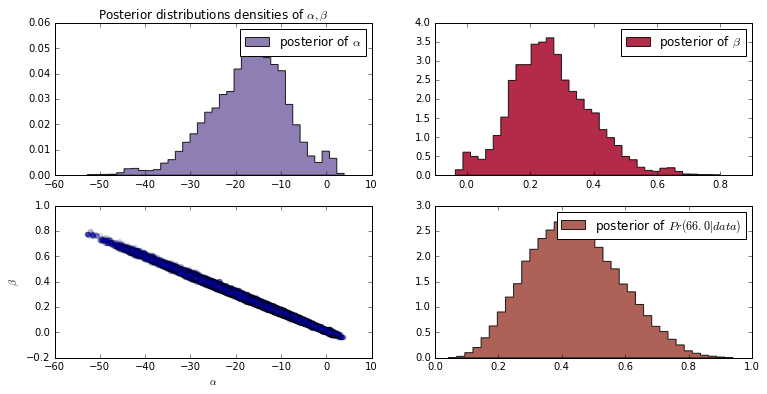

In [9]:
# ######################################
# PLOT THE HISTOGRAM OF THE MCMC SAMPLE
# #####################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 6)
#
plt.subplot(221)
plt.title(r"Posterior distributions densities of $\alpha, \beta$")
plt.hist(alpha_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#7A68A6", normed=True)
plt.legend()
#
plt.subplot(222)
plt.hist(beta_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#A60628", normed=True)
plt.legend();
#
plt.subplot(223)
plt.scatter(alpha_sample, beta_sample, alpha=0.1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
#
plt.subplot(224)
Pr66 = logistic(66.0,  beta_sample  , alpha_sample  ).flatten(1)
plt.hist(Pr66, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $Pr(66.0|data)$", color="#A04538", normed=True)
plt.legend();

# COMPUTE POINT ESTIMATES

# POINT ESTIMATES OF UNKNOWN PRAMETERS

def iat(x):
    # from http://tinyurl.com/afz57c4
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    result = result[result.size / 2:]
    return np.sum(result)

alpha_est = np.mean(alpha_sample)
alpha_se = np.sqrt(np.var(alpha_sample)*iat(alpha_sample)/alpha_sample.size)

beta_est = np.mean(beta_sample)
beta_se = np.sqrt(np.var(beta_sample)*iat(beta_sample)/beta_sample.size)

Pr66_est = np.mean(Pr66)
Pr66_se = np.sqrt(np.var(Pr66)*iat(Pr66)/Pr66.size)

print "Point estimate for alpha:", alpha_est 
print "Standard error for alpha:", alpha_se 
print " "
print "Point estimate for beta:", beta_est 
print "Standard error for beta:", beta_se
print " "
print "Point estimate for Pr(t=66.0|data):", Pr66_est 
print "Standard error for betPr(t=66.0|data):a:", Pr66_se
print " "

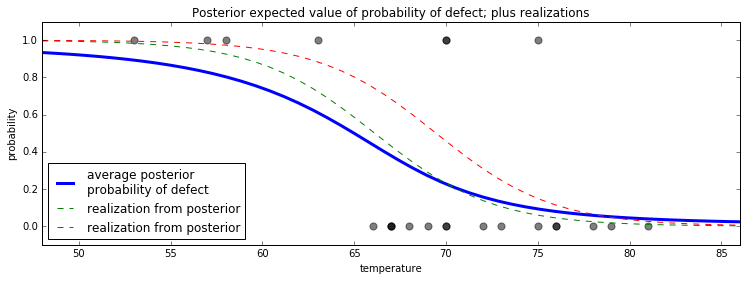

In [10]:

# ######################################
# PLOT THE PREDICTIONS
# #####################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_sample, alpha_sample)
mean_prob_t = p_t.mean(axis=0)

# print alpha_sample.shape, alpha_samples.shape

# print mean_prob_t

figsize(12.5, 4)

plt.plot(t, mean_prob_t, lw=3, label="average posterior \nprobability \
of defect")
plt.plot(t, p_t[-10, :], ls="--", label="realization from posterior")
plt.plot(t, p_t[-2, :], ls="--", label="realization from posterior")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.title("Posterior expected value of probability of defect; \
plus realizations")
plt.legend(loc="lower left")
plt.ylim(-0.1, 1.1)
plt.xlim(t.min(), t.max())
plt.ylabel("probability")
plt.xlabel("temperature");
plt.show()



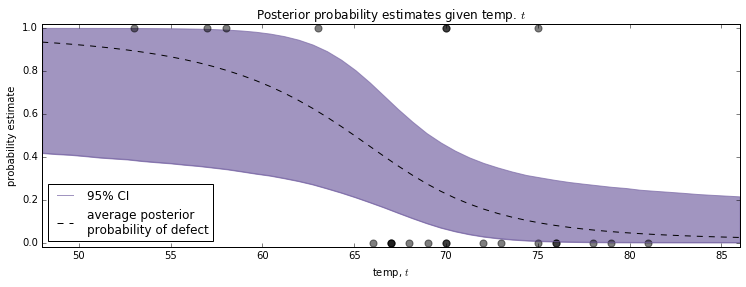

In [11]:
# ##################################################
# PLOT THE PREDICTIONS WITH 95% PREDICTIVE INTERVALS
# ##################################################

from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");
plt.show()


# MCMC inference by designing our own MCMC sampler 

![](slides_mcmc_1/slides-18.png)

![](slides_mcmc_1/slides-19.png)

![](slides_mcmc_1/slides-20.png)

![](slides_mcmc_1/slides-21.png)

![](slides_mcmc_1/slides-22.png)

![](slides_mcmc_1/slides-23.png)

![](slides_mcmc_1/slides-24.png)

![](slides_mcmc_1/slides-25.png)

![](slides_mcmc_1/slides-26.png)

![](slides_mcmc_1/slides-27.png)

![](slides_mcmc_1/slides-28.png)

![](slides_mcmc_1/slides-29.png)

![](slides_mcmc_1/slides-30.png)

## Random Walk Metropolis algorithm

Numerical example ...

In [12]:
# #################################################
# RUN THE RWM AND UPDATE SIMULTANEUSLY (apha, beta)
# #################################################

# #################################################
# SAMPLER:
# SET A SEED X_0 = (A_0,B_0)
# FOR T=1,...N
#     X_{T+1}  ~ P_{SCL}( X_{T} , d .)
# #################################################

# #################################################
# SAMPLER:
# SET A SEED X_0 = (A_0,B_0)
# FOR T=1,...N
#     1. PROPOSE X' ~ N( X_T , DIAG(SCL SCL)
#     2. COMPUTE ACCEPTANCE PROBABILITY A(X_T,X')
#     3. ACCEPT OR REJECT
# #################################################

# set number of iterations
N_iter = 100000
mcmc_sample = np.zeros((2,N_iter))

# set the seeds for (apha, beta)
alpha_now = 1.0
beta_now = 1.0

# set the scale of the RWM proposal
scl = 0.5
# scl_alpha = 0.1
# scl_beta = 0.5

# generate the iterations
# for iter=1:N_iter, sample x_{iter} ~ P( x_{iter} , d . )

for iter in range(0,N_iter) :
    
    # SIMULATE FROM THE RWM TRANSITION PROBABILITY
    
    # Generate the proposed values

    alpha_prop = alpha_now +scl*np.random.normal(0, 1)
    beta_prop = beta_now +scl*np.random.normal(0, 1)
    # alpha_prop = alpha_now +scl_alpha*np.random.normal(0, 1)
    # beta_prop = beta_now +scl_beta*np.random.normal(0, 1)
    
    # Compute the acceptance probability
    
    alpha.set_value(alpha_now)
    beta.set_value(beta_now)
    pdf_now = np.exp(model.logp)
    
    alpha.set_value(alpha_prop)
    beta.set_value(beta_prop)
    #pdf_prop = np.exp(model.logp)
    try :
        log_pdf_prop = model.logp
    except :
           pdf_prop = 0.0
    else:
        pdf_prop = np.exp(log_pdf_prop)
    
    acc_prob = min( 1.0, pdf_prop/pdf_now )
    
    # Accept or Reject
    
    u = np.random.uniform(0, 1)
    if acc_prob > u :
        mcmc_sample[0,iter] = alpha_prop
        mcmc_sample[1,iter] = beta_prop
        alpha_now = alpha_prop
        beta_now = beta_prop
    else:
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_now
#

print "DONE"


DONE


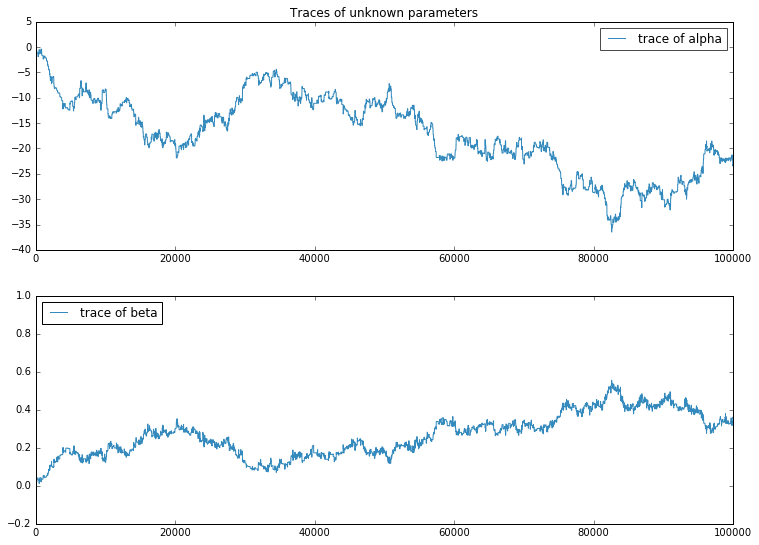

In [13]:
# ######################################
# TRACE PLOTS OF THE SAMPLE
# ######################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

figsize(12.5, 9)
plt.subplot(211)
lw = 1

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"]

plt.plot(alpha_sample, label="trace of alpha", c=colors[0])
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(212)
plt.plot(beta_sample, label="trace of beta",
     c=colors[0], lw=lw)
plt.legend(loc="upper left")


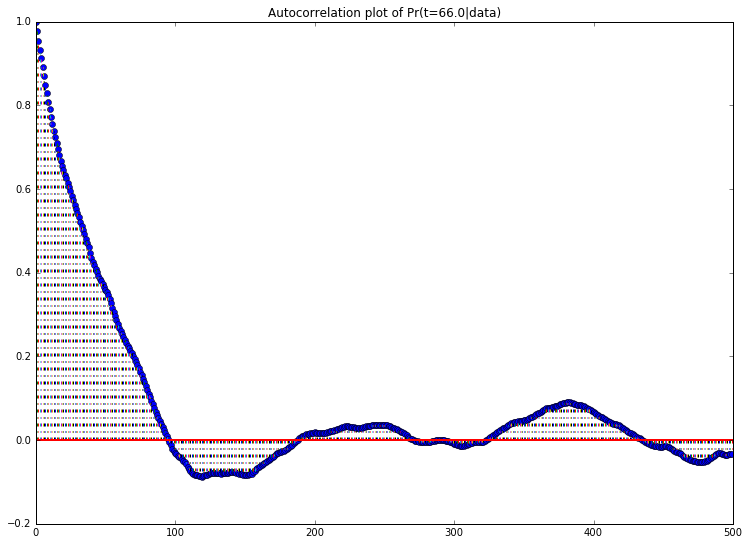

In [14]:
# AUTOCORRELATION OF ESTIMATED Pr(66.0)

def myacorr(x) :
    mean_x = x.mean()
    z = np.fft.fft( x-mean_x, int(2**np.ceil( np.log2(2*x.size) ))+1 )
    z = z.real**2 + z.imag**2
    z = np.fft.ifft( z ).real
    z = z[:x.size]
    z = z/z[0]
    return z

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

xx = logistic(66.0,  beta_sample[-5000:] , alpha_sample[-5000:] ).flatten(1)

yy = myacorr(xx)[:500]
figsize(12.5, 9)
markerline, stemlines, baseline = plt.stem( yy, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title("Autocorrelation plot of Pr(t=66.0|data)")


Point estimate for alpha: -17.1456880637
Standard error for alpha: 4.87940802151
 
Point estimate for beta: 0.264270268401
Standard error for beta: 0.0719475508388
 
Point estimate for Pr(t=66.0|data): 0.433320653843
Standard error for betPr(t=66.0|data):a: 0.0964060078428
 


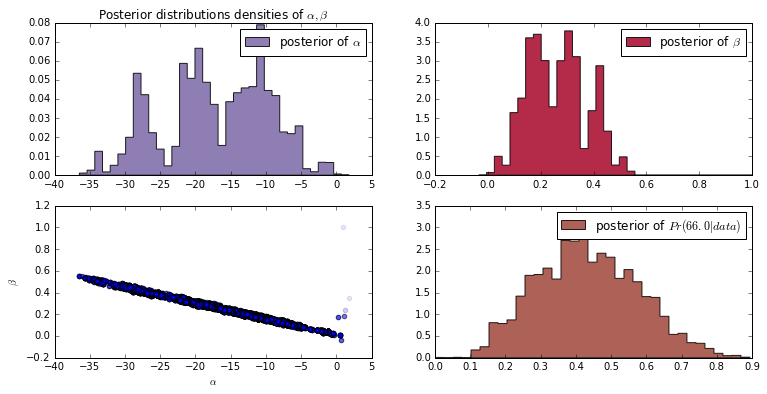

In [15]:
# ######################################
# PLOT THE HISTOGRAM OF THE MCMC SAMPLE
# #####################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 6)
#
plt.subplot(221)
plt.title(r"Posterior distributions densities of $\alpha, \beta$")
plt.hist(alpha_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#7A68A6", normed=True)
plt.legend()
#
plt.subplot(222)
plt.hist(beta_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#A60628", normed=True)
plt.legend();
#
plt.subplot(223)
plt.scatter(alpha_sample, beta_sample, alpha=0.1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
#
plt.subplot(224)
Pr66 = logistic(66.0,  beta_sample  , alpha_sample  ).flatten(1)
plt.hist(Pr66, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $Pr(66.0|data)$", color="#A04538", normed=True)
plt.legend();

# COMPUTE POINT ESTIMATES

# POINT ESTIMATES OF UNKNOWN PRAMETERS

def iat(x):
    # from http://tinyurl.com/afz57c4
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    result = result[result.size / 2:]
    return np.sum(result)

alpha_est = np.mean(alpha_sample)
alpha_se = np.sqrt(np.var(alpha_sample)*iat(alpha_sample)/alpha_sample.size)

beta_est = np.mean(beta_sample)
beta_se = np.sqrt(np.var(beta_sample)*iat(beta_sample)/beta_sample.size)

Pr66_est = np.mean(Pr66)
Pr66_se = np.sqrt(np.var(Pr66)*iat(Pr66)/Pr66.size)

print "Point estimate for alpha:", alpha_est 
print "Standard error for alpha:", alpha_se 
print " "
print "Point estimate for beta:", beta_est 
print "Standard error for beta:", beta_se
print " "
print "Point estimate for Pr(t=66.0|data):", Pr66_est 
print "Standard error for betPr(t=66.0|data):a:", Pr66_se
print " "



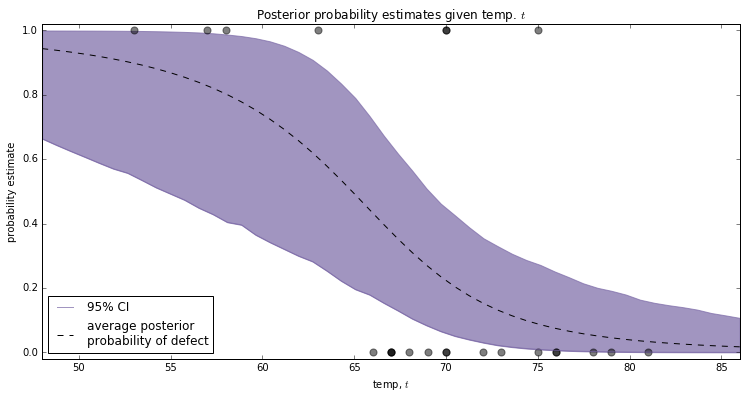

In [16]:
# ##################################################
# PLOT THE PREDICTIONS WITH 95% PREDICTIVE INTERVALS
# ##################################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_sample, alpha_sample)
mean_prob_t = p_t.mean(axis=0)

from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");
plt.show()



![](slides_mcmc_1/slides-32.png)

![](slides_mcmc_1/slides-33.png)

![](slides_mcmc_1/slides-34.png)

![](slides_mcmc_1/slides-35.png)

## Adaptive random Walk Metropolis algorithm

Numerical example ...

In [17]:
# #################################################
# RUN THE ADAPTIVE RWM : 
#     UPDATE SIMULTANEUSLY (apha, beta)
#     ADJUST SCL
# #################################################

# #################################################
# SAMPLER:
# SET A SEED X_0 = (A_0,B_0)
# FOR T=1,...N
#     SAMPLE: X_{T+1}  ~ P_{SCL}( X_{T} , d .)
#     ADJUST: SCL VIA STOCHASTIC APPROXIMATION
# #################################################

# #################################################
# SAMPLER:
# SET A SEED X_0 = (A_0,B_0)
# FOR T=1,...N
#     SAMPLE: 
#     1. PROPOSE X' ~ N( X_T , DIAG(SCL SCL)
#     2. COMPUTE ACCEPTANCE PROBABILITY A(X_T,X')
#     3. ACCEPT OR REJECT
#     ADJUST:
#     1. LOG(SCL) <- LOG(SCL) + GT*(A(X_T,X')-A_OPT)
# #################################################

# set number of iterations
N_iter = 100000
mcmc_sample = np.zeros((2,N_iter))

# set the seeds for (apha, beta)
alpha_now = 1.0
beta_now = 1.0

# set the scale of the RWM proposal
scl = 0.1

# optimal acceptance prob.
a_opt = 0.234

# gain sequence
def gain(t) :
    C = 1.0
    S = 0.9
    gt = C / ((1.0*t)**S)
    return gt

# generate the iterations
# for iter=1:N_iter, sample x_{iter} ~ P( x_{iter} , d . )

for iter in range(0,N_iter) :
    
    # SIMULATE FROM THE RWM TRANSITION PROBABILITY
    
    # Generate the proposed values
  
    alpha_prop = alpha_now +scl*np.random.normal(0, 1)
    beta_prop = beta_now +scl*np.random.normal(0, 1)
    
    # Compute the acceptance probability
    
    alpha.set_value(alpha_now)
    beta.set_value(beta_now)
    pdf_now = np.exp(model.logp)
    
    alpha.set_value(alpha_prop)
    beta.set_value(beta_prop)
    #pdf_prop = np.exp(model.logp)
    try :
        log_pdf_prop = model.logp
    except :
           pdf_prop = 0.0
    else:
        pdf_prop = np.exp(log_pdf_prop)
    
    
    acc_prob = min( 1.0, pdf_prop/pdf_now )
    
    # Accept or Reject
    
    u = np.random.uniform(0, 1)
    if acc_prob > u :
        mcmc_sample[0,iter] = alpha_prop
        mcmc_sample[1,iter] = beta_prop
        alpha_now = alpha_prop
        beta_now = beta_prop
    else :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_now
    
    # Adapt
    
    scl = scl * np.exp( gain(iter+1.0) * (acc_prob-a_opt) )
    
#
print 'Optimal scale : ',  scl


Optimal scale :  0.04003811917


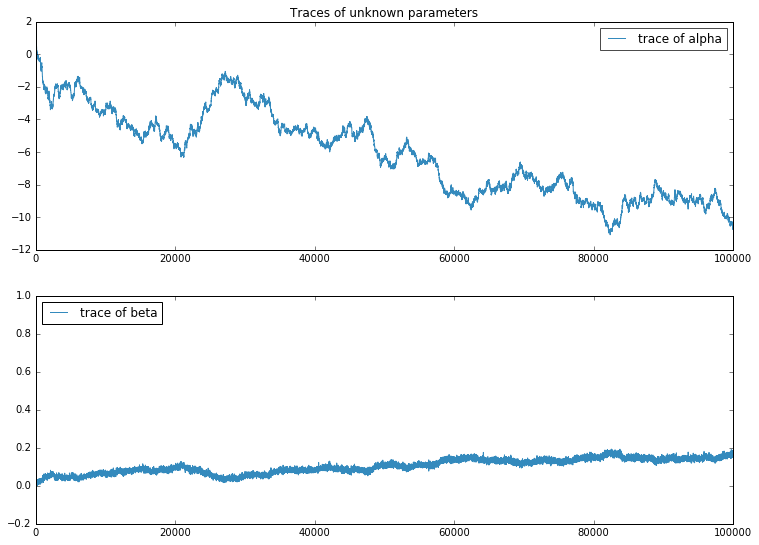

In [18]:
# ######################################
# TRACE PLOTS OF THE SAMPLE
# ######################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

figsize(12.5, 9)
plt.subplot(211)
lw = 1
#center_trace = mcmc.trace
# alpha_samples = mcmc.trace('alpha')[:, None]  # best to make them 1d

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"]
#if center_trace[-1, 0] > center_trace[-1, 1] \
#    else ["#A60628", "#348ABD"]

plt.plot(alpha_sample, label="trace of alpha", c=colors[0])
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(212)
# beta_samples = mcmc.trace('beta')[:, None]
plt.plot(beta_sample, label="trace of beta",
     c=colors[0], lw=lw)
plt.legend(loc="upper left")



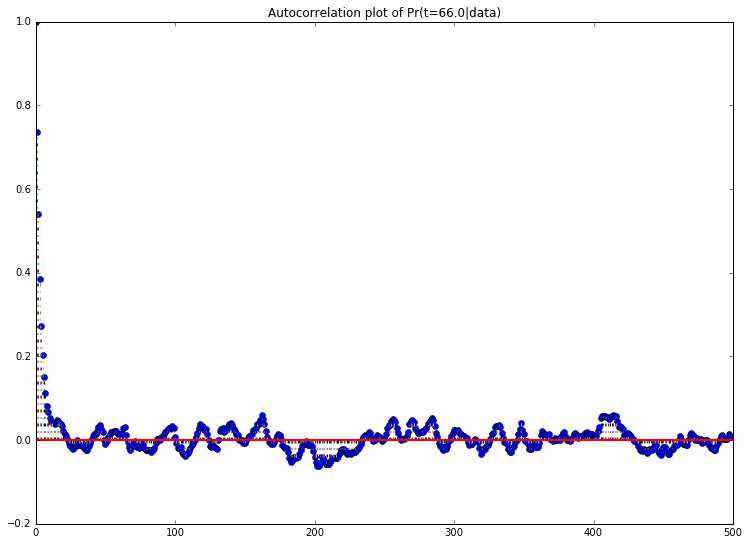

In [19]:
# AUTOCORRELATION OF ESTIMATED Pr(66.0)

def myacorr(x) :
    mean_x = x.mean()
    z = np.fft.fft( x-mean_x, int(2**np.ceil( np.log2(2*x.size) ))+1 )
    z = z.real**2 + z.imag**2
    z = np.fft.ifft( z ).real
    z = z[:x.size]
    z = z/z[0]
    return z

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

xx = logistic(66.0,  beta_sample[-5000:] , alpha_sample[-5000:] ).flatten(1)

yy = myacorr(xx)[:500]
figsize(12.5, 9)
markerline, stemlines, baseline = plt.stem( yy, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title("Autocorrelation plot of Pr(t=66.0|data)")


Point estimate for alpha: -6.08264916359
Standard error for alpha: 1.68513311355
 
Point estimate for beta: 0.102363977243
Standard error for beta: 0.0258234208391
 
Point estimate for Pr(t=66.0|data): 0.34802590631
Standard error for betPr(t=66.0|data):a: 0.0719795864475
 


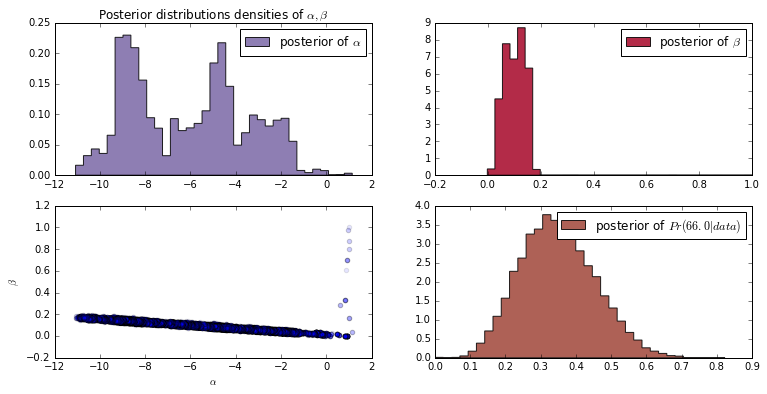

In [20]:
# ######################################
# PLOT THE HISTOGRAM OF THE MCMC SAMPLE
# #####################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 6)
#
plt.subplot(221)
plt.title(r"Posterior distributions densities of $\alpha, \beta$")
plt.hist(alpha_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#7A68A6", normed=True)
plt.legend()
#
plt.subplot(222)
plt.hist(beta_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#A60628", normed=True)
plt.legend();
#
plt.subplot(223)
plt.scatter(alpha_sample, beta_sample, alpha=0.1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
#
plt.subplot(224)
Pr66 = logistic(66.0,  beta_sample  , alpha_sample  ).flatten(1)
plt.hist(Pr66, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $Pr(66.0|data)$", color="#A04538", normed=True)
plt.legend();

# COMPUTE POINT ESTIMATES

# POINT ESTIMATES OF UNKNOWN PRAMETERS

def iat(x):
    # from http://tinyurl.com/afz57c4
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    result = result[result.size / 2:]
    return np.sum(result)

alpha_est = np.mean(alpha_sample)
alpha_se = np.sqrt(np.var(alpha_sample)*iat(alpha_sample)/alpha_sample.size)

beta_est = np.mean(beta_sample)
beta_se = np.sqrt(np.var(beta_sample)*iat(beta_sample)/beta_sample.size)

Pr66_est = np.mean(Pr66)
Pr66_se = np.sqrt(np.var(Pr66)*iat(Pr66)/Pr66.size)

print "Point estimate for alpha:", alpha_est 
print "Standard error for alpha:", alpha_se 
print " "
print "Point estimate for beta:", beta_est 
print "Standard error for beta:", beta_se
print " "
print "Point estimate for Pr(t=66.0|data):", Pr66_est 
print "Standard error for betPr(t=66.0|data):a:", Pr66_se
print " "


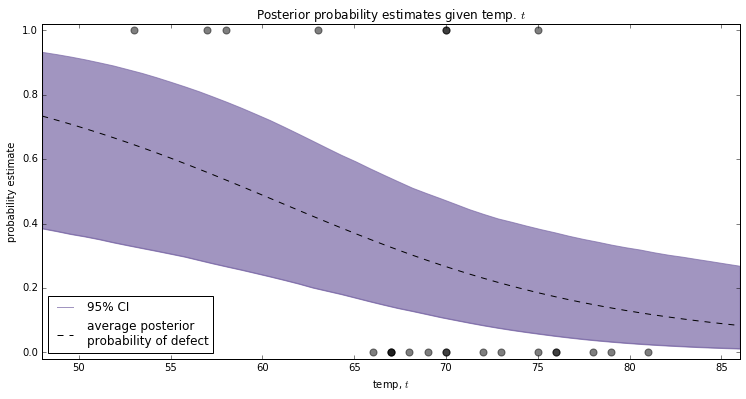

In [21]:
# ##################################################
# PLOT THE PREDICTIONS WITH 95% PREDICTIVE INTERVALS
# ##################################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_sample, alpha_sample)
mean_prob_t = p_t.mean(axis=0) 

from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");
plt.show()



![](slides_mcmc_1/slides-37.png)

![](slides_mcmc_1/slides-38.png)

![](slides_mcmc_1/slides-39.png)

![](slides_mcmc_1/slides-40.png)

![](slides_mcmc_1/slides-42.png)

![](slides_mcmc_1/slides-43.png)

## Blockwise MCMC with Random Walk Metropolis

Numerical example ...

In [22]:
# #################################################
# RUN THE BLOCKWISE RWM : 
#     UPDATE apha
#     UPDATE beta
# #################################################

# #################################################
# SAMPLER:
# SET A SEED X_0 = (A_0,B_0)
# FOR T=1,...N
#
#     BLOCK: UPDATE ALPHA
#     SAMPLE: X'=(A',B_{T})  ~ P_{SCL_A}^{ALPHA}( X_{T}=(A_{T},B_{T}) , d .) 
#
#     BLOCK: UPDATE BETA
#     SAMPLE: X''=(A',B')  ~ P_{SCL_B}^{BETA}( X'=(A',B_{T}) , d .)
# #################################################

# #################################################
#     BLOCK: UPDATE ALPHA
#
#     SAMPLE: 
#     1. PROPOSE X'=(A',B') S.T.  A'~ N( A_{T} , SCL_A) AND B' = B_{T}
#     2. COMPUTE ACCEPTANCE PROBABILITY A(X_T,X')
#     3. ACCEPT OR REJECT
# #################################################

# #################################################
#     BLOCK: UPDATE BETA
#
#     SAMPLE: 
#     1. PROPOSE X'=(A',B') S.T. A' = A_{T} AND B'~ N( B_{T} , SCL_B)
#     2. COMPUTE ACCEPTANCE PROBABILITY A(X_T,X')
#     3. ACCEPT OR REJECT
# #################################################

# set number of iterations
N_iter = 100000
mcmc_sample = np.zeros((2,N_iter))

# set the seeds for (apha, beta)
alpha_now = -10.0
beta_now = 0.2

# set the scale of the RWM proposal
scl_alpha = 0.1
scl_beta = 0.1

# gain sequence
def gain(t) :
    C = 1.0
    S = 0.6
    gt = C / ((1.0*t)**S)
    return gt

# generate the iterations
# for iter=1:N_iter, sample x_{iter} ~ P( x_{iter} , d . )

for iter in range(0,N_iter) :
    
    # SIMULATE FROM THE RWM TRANSITION PROBABILITY
    
    # ==================
    # BLOCK UPDATE ALPHA 
    # ==================

    # Generate the proposed values
    
    alpha_prop = alpha_now +scl_alpha*np.random.normal(0, 1)
    beta_now = beta_now
    
    # Compute the acceptance probability
    
    alpha.set_value(alpha_now)
    beta.set_value(beta_now)
    pdf_now = np.exp(model.logp)
    
    alpha.set_value(alpha_prop)
    beta.set_value(beta_prop)
    #pdf_prop = np.exp(model.logp)
    try :
        log_pdf_prop = model.logp
    except :
           pdf_prop = 0.0
    else:
        pdf_prop =  np.exp(log_pdf_prop)
    
    acc_prob = min( 1.0, pdf_prop/pdf_now )
    
    # Accept or Reject
    
    u = np.random.uniform(0, 1)
    if acc_prob > u :
        mcmc_sample[0,iter] = alpha_prop
        mcmc_sample[1,iter] = beta_now
        alpha_now = alpha_prop
        beta_now = beta_now
    else :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_now
    
    # ==================
    # BLOCK UPDATE BETA 
    # ==================
    
    # Generate the proposed values
    
    alpha_prop = alpha_now
    beta_prop = beta_now +scl_beta*np.random.normal(0, 1)
    
    # Compute the acceptance probability
    
    alpha.set_value(alpha_now)
    beta.set_value(beta_now)
    pdf_now = np.exp(model.logp)
    
    alpha.set_value(alpha_prop)
    beta.set_value(beta_prop)
    #pdf_prop = np.exp(model.logp)
    try :
        log_pdf_prop = model.logp
    except :
           pdf_prop = 0.0
    else:
        pdf_prop =  np.exp(log_pdf_prop)
    
    acc_prob = min( 1.0, pdf_prop/pdf_now )
    
    # Accept or Reject
    
    u = np.random.uniform(0, 1)
    if acc_prob > u :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_prop
        alpha_now = alpha_prop
        beta_now = beta_prop
    else :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_now
    
#
print "DONE"


DONE


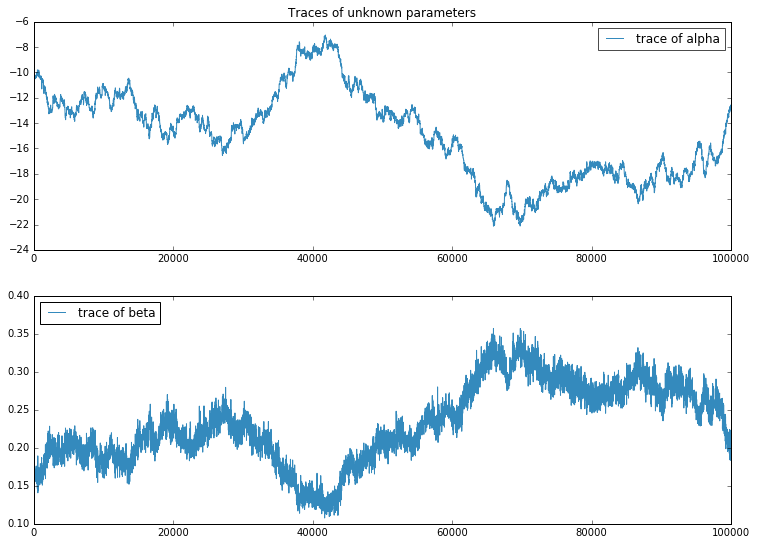

In [23]:
# ######################################
# TRACE PLOTS OF THE SAMPLE
# ######################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 9)
plt.subplot(211)
lw = 1
#center_trace = mcmc.trace
# alpha_samples = mcmc.trace('alpha')[:, None]  # best to make them 1d

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"]
#if center_trace[-1, 0] > center_trace[-1, 1] \
#    else ["#A60628", "#348ABD"]

plt.plot(alpha_sample, label="trace of alpha", c=colors[0])
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(212)
# beta_samples = mcmc.trace('beta')[:, None]
plt.plot(beta_sample, label="trace of beta",
     c=colors[0], lw=lw)
plt.legend(loc="upper left")

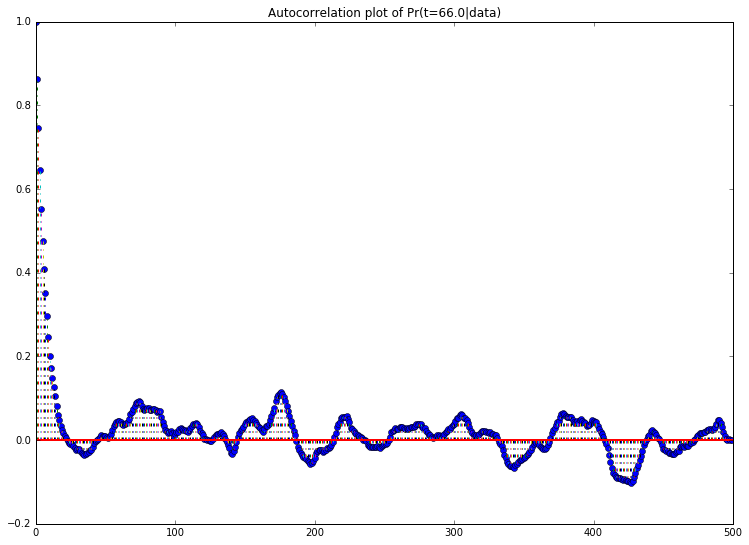

In [24]:
# AUTOCORRELATION OF ESTIMATED Pr(66.0)

def myacorr(x) :
    mean_x = x.mean()
    z = np.fft.fft( x-mean_x, int(2**np.ceil( np.log2(2*x.size) ))+1 )
    z = z.real**2 + z.imag**2
    z = np.fft.ifft( z ).real
    z = z[:x.size]
    z = z/z[0]
    return z

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

xx = logistic(66.0,  beta_sample[-5000:] , alpha_sample[-5000:] ).flatten(1)

yy = myacorr(xx)[:500]
figsize(12.5, 9)
markerline, stemlines, baseline = plt.stem( yy, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title("Autocorrelation plot of Pr(t=66.0|data)")

Point estimate for alpha: -14.9146880018
Standard error for alpha: 2.38104260095
 
Point estimate for beta: 0.231205952768
Standard error for beta: 0.0352996287928
 
Point estimate for Pr(t=66.0|data): 0.420734181825
Standard error for betPr(t=66.0|data):a: 0.0861856246951
 


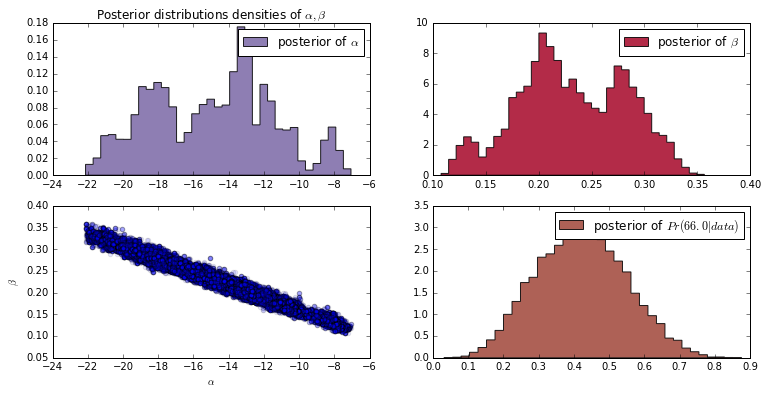

In [25]:
# ######################################
# PLOT THE HISTOGRAM OF THE MCMC SAMPLE
# #####################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 6)
#
plt.subplot(221)
plt.title(r"Posterior distributions densities of $\alpha, \beta$")
plt.hist(alpha_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#7A68A6", normed=True)
plt.legend()
#
plt.subplot(222)
plt.hist(beta_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#A60628", normed=True)
plt.legend();
#
plt.subplot(223)
plt.scatter(alpha_sample, beta_sample, alpha=0.1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
#
plt.subplot(224)
Pr66 = logistic(66.0,  beta_sample  , alpha_sample  ).flatten(1)
plt.hist(Pr66, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $Pr(66.0|data)$", color="#A04538", normed=True)
plt.legend();

# COMPUTE POINT ESTIMATES

# POINT ESTIMATES OF UNKNOWN PRAMETERS

def iat(x):
    # from http://tinyurl.com/afz57c4
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    result = result[result.size / 2:]
    return np.sum(result)

alpha_est = np.mean(alpha_sample)
alpha_se = np.sqrt(np.var(alpha_sample)*iat(alpha_sample)/alpha_sample.size)

beta_est = np.mean(beta_sample)
beta_se = np.sqrt(np.var(beta_sample)*iat(beta_sample)/beta_sample.size)

Pr66_est = np.mean(Pr66)
Pr66_se = np.sqrt(np.var(Pr66)*iat(Pr66)/Pr66.size)

print "Point estimate for alpha:", alpha_est 
print "Standard error for alpha:", alpha_se 
print " "
print "Point estimate for beta:", beta_est 
print "Standard error for beta:", beta_se
print " "
print "Point estimate for Pr(t=66.0|data):", Pr66_est 
print "Standard error for betPr(t=66.0|data):a:", Pr66_se
print " "


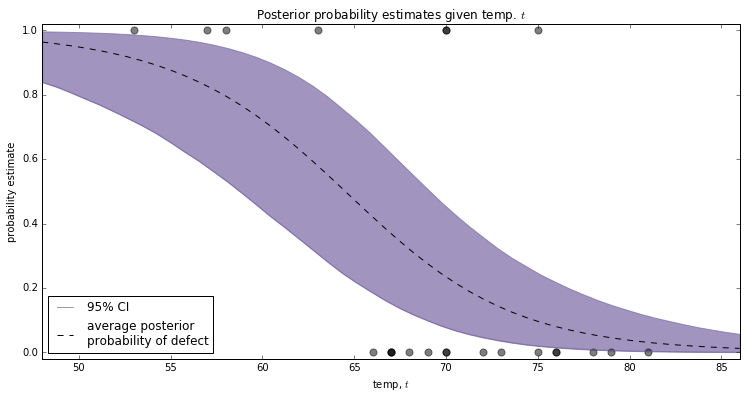

In [26]:
# ##################################################
# PLOT THE PREDICTIONS WITH 95% PREDICTIVE INTERVALS
# ##################################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_sample, alpha_sample)
mean_prob_t = p_t.mean(axis=0) 

from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");
plt.show()



## Blockwise MCMC with adaptive Random Walk Metropolis

In [47]:
# #################################################
# RUN THE BLOCKWISE MCMC WITH ADAPTIVE RWM: 
# 
# BLOCK: UPDATE ALPHA
#     UPDATE apha
#     ADJUST SCL_A
# 
# BLOCK: UPDATE ALPHA
#     UPDATE beta
#     ADJUST SCL_B
# 
# #################################################

# #################################################
# SAMPLER:
# SET A SEED X_0 = (A_0,B_0)
# FOR T=1,...N
#
#     BLOCK: UPDATE ALPHA
#     SAMPLE: X'=(A',B_{T})  ~ P_{SCL_A}^{ALPHA}( X_{T}=(A_{T},B_{T}) , d .) 
#     ADJUST: SCL_A VIA STOCHASTIC APPROXIMATION
#
#     BLOCK: UPDATE BETA
#     SAMPLE: X''=(A',B')  ~ P_{SCL_B}^{BETA}( X'=(A',B_{T}) , d .)
#     ADJUST: SCL_B VIA STOCHASTIC APPROXIMATION
# #################################################

# #################################################
#     BLOCK: UPDATE ALPHA
#
#     SAMPLE: 
#     1. PROPOSE X'=(A',B') S.T.  A'~ N( A_{T} , SCL_A) AND B' = B_{T}
#     2. COMPUTE ACCEPTANCE PROBABILITY A(X_T,X')
#     3. ACCEPT OR REJECT
# #################################################

# #################################################
#     ADJUST:
#     1. LOG(SCL_A) <- LOG(SCL_A) + GT*(A(X_T,X')-A_OPT)
# #################################################

# #################################################
#     BLOCK: UPDATE BETA
#
#     SAMPLE: 
#     1. PROPOSE X'=(A',B') S.T. A' = A_{T} AND B'~ N( B_{T} , SCL_B)
#     2. COMPUTE ACCEPTANCE PROBABILITY A(X_T,X')
#     3. ACCEPT OR REJECT
# #################################################

# #################################################
#     ADJUST:
#     1. LOG(SCL_B) <- LOG(SCL_B) + GT*(A(X_T,X')-A_OPT)
# #################################################


# set number of iterations
N_iter = 100000
mcmc_sample = np.zeros((2,N_iter))

# set the seeds for (apha, beta)
alpha_now = 1.0
beta_now = 1.0

# set the scale of the RWM proposal
scl_alpha = 0.1
scl_beta = 0.1

# optimal acceptance prob.
a_opt = 0.234
it_alpha = 0 ;
it_beta = 0 ;

# gain sequence
def gain(t) :
    C = 1.0
    S = 0.6
    gt = C / ((1.0*t)**S)
    return gt

# generate the iterations
# for iter=1:N_iter, sample x_{iter} ~ P( x_{iter} , d . )

for iter in range(0,N_iter) :
    
    # SIMULATE FROM THE RWM TRANSITION PROBABILITY
    
    # ==================
    # BLOCK UPDATE ALPHA 
    # ==================
    
    # Generate the proposed values
    
    alpha_prop = alpha_now +scl_alpha*np.random.normal(0, 1)
    beta_prop = beta_now
    
    # Compute the acceptance probability
    
    alpha.set_value(alpha_now)
    beta.set_value(beta_now)
    pdf_now = np.exp(model.logp)
    
    alpha.set_value(alpha_prop)
    beta.set_value(beta_prop)
    #pdf_prop = np.exp(model.logp)
    try :
        log_pdf_prop = model.logp
    except :
           pdf_prop = 0.0
    else:
        pdf_prop = np.exp(log_pdf_prop)
    
    acc_prob = min( 1.0, pdf_prop/pdf_now )
    
    # Accept or Reject
    
    u = np.random.uniform(0, 1)
    if acc_prob > u :
        mcmc_sample[0,iter] = alpha_prop
        mcmc_sample[1,iter] = beta_now
        alpha_now = alpha_prop
        beta_now = beta_prop
    else :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_now
    
    # Adapt scl_alpha
    
    it_alpha = it_alpha+1.0
    scl_alpha = scl_alpha * np.exp( gain(it_alpha) * (acc_prob-a_opt) )
    
    # ==================
    # BLOCK UPDATE BETA 
    # ==================
    
    # Generate the proposed values
    
    alpha_prop = alpha_now
    beta_prop = beta_now +scl_beta*np.random.normal(0, 1)
    
    # Compute the acceptance probability
    
    alpha.set_value(alpha_now)
    beta.set_value(beta_now)
    pdf_now = np.exp(model.logp)
    
    alpha.set_value(alpha_prop)
    beta.set_value(beta_prop)
    #pdf_prop = np.exp(model.logp)
    try :
        log_pdf_prop = model.logp
    except :
           pdf_prop = 0.0
    else:
        pdf_prop = np.exp(log_pdf_prop)
    
    acc_prob = min( 1.0, pdf_prop/pdf_now )
    
    # Accept or Reject
    
    u = np.random.uniform(0, 1)
    if acc_prob > u :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_prop
        alpha_now = alpha_prop
        beta_now = beta_prop
    else :
        mcmc_sample[0,iter] = alpha_now
        mcmc_sample[1,iter] = beta_now
    
    # Adapt
    
    it_beta = it_beta+1.0
    scl_beta = scl_beta * np.exp( gain(it_beta) * (acc_prob-a_opt) )
    
#
print 'Optimal scale : ',  scl_alpha, scl_beta


Optimal scale :  2.79675172702 0.0421394679237


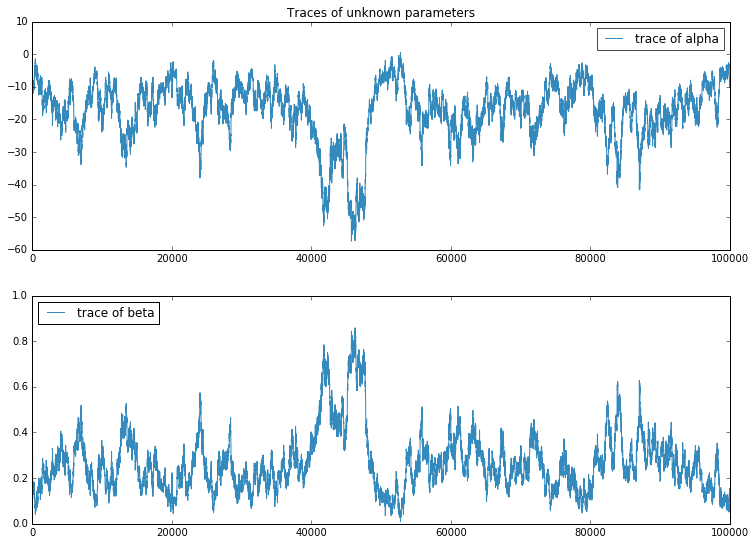

In [48]:
# ######################################
# TRACE PLOTS OF THE SAMPLE
# ######################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 9)
plt.subplot(211)
lw = 1
#center_trace = mcmc.trace
# alpha_samples = mcmc.trace('alpha')[:, None]  # best to make them 1d

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"]
#if center_trace[-1, 0] > center_trace[-1, 1] \
#    else ["#A60628", "#348ABD"]

plt.plot(alpha_sample, label="trace of alpha", c=colors[0])
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(212)
# beta_samples = mcmc.trace('beta')[:, None]
plt.plot(beta_sample, label="trace of beta",
     c=colors[0], lw=lw)
plt.legend(loc="upper left")



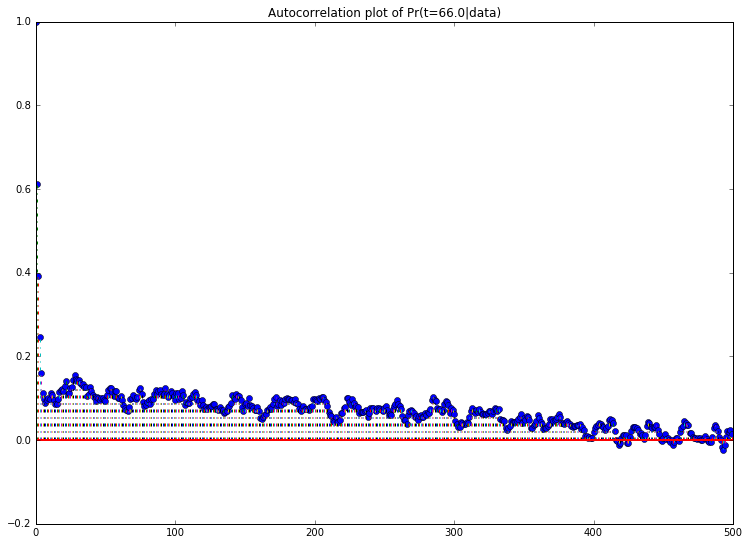

In [49]:
# AUTOCORRELATION OF ESTIMATED Pr(66.0)

def myacorr(x) :
    mean_x = x.mean()
    z = np.fft.fft( x-mean_x, int(2**np.ceil( np.log2(2*x.size) ))+1 )
    z = z.real**2 + z.imag**2
    z = np.fft.ifft( z ).real
    z = z[:x.size]
    z = z/z[0]
    return z

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

xx = logistic(66.0,  beta_sample[-5000:] , alpha_sample[-5000:] ).flatten(1)

yy = myacorr(xx)[:500]
figsize(12.5, 9)
markerline, stemlines, baseline = plt.stem( yy, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title("Autocorrelation plot of Pr(t=66.0|data)")


Point estimate for alpha: -17.3181459445
Standard error for alpha: 5.63436808373
 
Point estimate for beta: 0.266731316233
Standard error for beta: 0.0836385289086
 
Point estimate for Pr(t=66.0|data): 0.436600054238
Standard error for betPr(t=66.0|data):a: 0.0967108612312
 


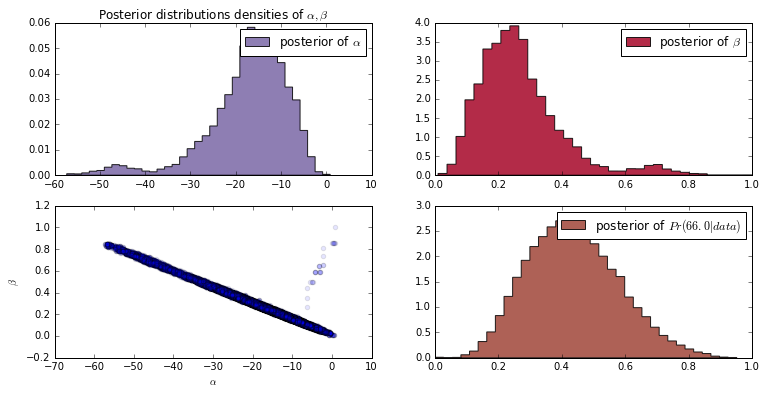

In [50]:

# ######################################
# PLOT THE HISTOGRAM OF THE MCMC SAMPLE
# #####################################

alpha_sample = mcmc_sample[0,:]
beta_sample = mcmc_sample[1,:]

figsize(12.5, 6)
#
plt.subplot(221)
plt.title(r"Posterior distributions densities of $\alpha, \beta$")
plt.hist(alpha_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#7A68A6", normed=True)
plt.legend()
#
plt.subplot(222)
plt.hist(beta_sample, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#A60628", normed=True)
plt.legend();
#
plt.subplot(223)
plt.scatter(alpha_sample, beta_sample, alpha=0.1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
#
plt.subplot(224)
Pr66 = logistic(66.0,  beta_sample  , alpha_sample  ).flatten(1)
plt.hist(Pr66, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $Pr(66.0|data)$", color="#A04538", normed=True)
plt.legend();

# COMPUTE POINT ESTIMATES

# POINT ESTIMATES OF UNKNOWN PRAMETERS

def iat(x):
    # from http://tinyurl.com/afz57c4
    result = np.correlate(x, x, mode='full')
    result = result / np.max(result)
    result = result[result.size / 2:]
    return np.sum(result)

alpha_est = np.mean(alpha_sample)
alpha_se = np.sqrt(np.var(alpha_sample)*iat(alpha_sample)/alpha_sample.size)

beta_est = np.mean(beta_sample)
beta_se = np.sqrt(np.var(beta_sample)*iat(beta_sample)/beta_sample.size)

Pr66_est = np.mean(Pr66)
Pr66_se = np.sqrt(np.var(Pr66)*iat(Pr66)/Pr66.size)

print "Point estimate for alpha:", alpha_est 
print "Standard error for alpha:", alpha_se 
print " "
print "Point estimate for beta:", beta_est 
print "Standard error for beta:", beta_se
print " "
print "Point estimate for Pr(t=66.0|data):", Pr66_est 
print "Standard error for betPr(t=66.0|data):a:", Pr66_se
print " "



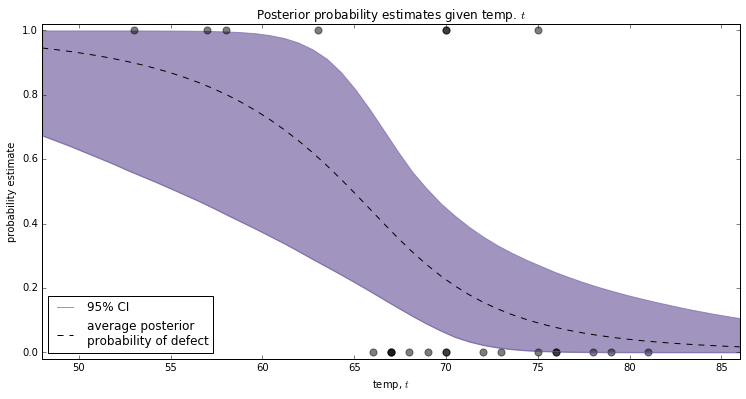

In [51]:
# ##################################################
# PLOT THE PREDICTIONS WITH 95% PREDICTIVE INTERVALS
# ##################################################

alpha_sample = mcmc_sample[0,:][:, None]
beta_sample = mcmc_sample[1,:][:, None]

t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_sample, alpha_sample)
mean_prob_t = p_t.mean(axis=0)

from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");
plt.show()




## Blockwise MCMC with adaptive MALA 

Practice

Steps:

1. Calculate the gradient of the log posterior distribution, and write a function 
2. Modify the sampler in Section "Blockwise MCMC with adaptive RWM"
    1. Change the proposals, acceptance probability, optimal a_opt, etc
    
Question:
    1. Does MALA work better than RWM ??


Notes: 
    If you cannot calculate directly the gradient of the log posterior distribution, you may compute it numerically.
    
    Here is a NOT efficient routine to do this:
    
    def gradPr(a,b) :
        myeps = 8.9406967163085938e-08
        alpha.set_value(a+myeps/2.0)
        beta.set_value(b)
        d1 = model.logp
        alpha.set_value(a-myeps/2.0)
        beta.set_value(b)
        d2 = model.logp
        da = (d2-d1) / myeps
        alpha.set_value(a)
        beta.set_value(b+myeps/2.0)
        d1 = model.logp
        alpha.set_value(a)
        beta.set_value(b-myeps/2.0)
        d2 = model.logp
        db = (d2-d1) / myeps
        return [a,b]
    
